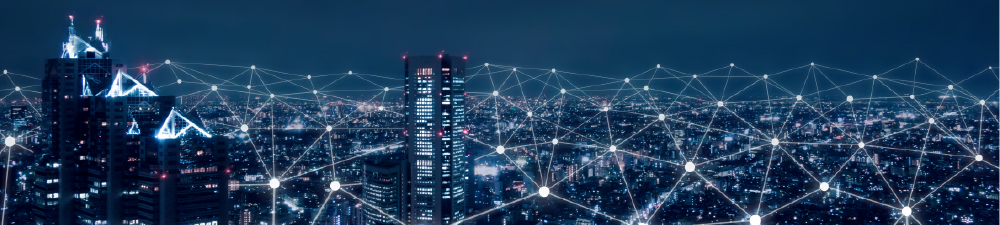

# Mini Project 3  - IU 4.6 Machine Learning

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading data and initial processing

In [2]:
#edit the file location of raw data set
cust_df=pd.read_csv("Mini_project_3_Data.xls")
pd.set_option('display.max_columns', None)
cust_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


## Exercise

## Placeholder for your analysis

In [3]:
# Type your code here to explore and understand the data better

#e.g., identify the dimension of cust_df
cust_df.shape


(51047, 58)

In [4]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [5]:
#How many customers had zero monthly revenue?
#Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis
##cust_df['MonthlyRevenue']==0.tolist()

print((cust_df['MonthlyRevenue']<=0).value_counts())
print("Total Customer IDs: " + str(cust_df['CustomerID'].count()) +" \n")   #some basic checks
print("Total Unique IDs: " + str(cust_df['CustomerID'].nunique()) +" \n")   #some basic checks

cust_df.index[cust_df['MonthlyRevenue'] == 0].tolist()
cust_df.index[cust_df['MonthlyRevenue'] < 0].tolist()
cust_df.shape

False    51038
True         9
Name: MonthlyRevenue, dtype: int64
Total Customer IDs: 51047 

Total Unique IDs: 51047 



[12262, 13127, 42051, 49920, 49946, 51035]

[26596, 33352, 48038]

(51047, 58)

In [6]:
cust_df.drop(cust_df[cust_df.MonthlyRevenue <= 0].index, inplace=True)
cust_df.shape

(51038, 58)

## Answer: 
6 customers have 0 monthly revenue and 3 customers have negative monthly revenue. All 9 are dropped from the cust_df.

### Q1.2 How many columns has missing values percentage > 5%

In [7]:
#Calculate for each column % of missing value in the data
#How many columns has missing values percentage > 5%
#What strategy should be used for imputation?
cust_df.isnull().mean() * 100

CustomerID                   0.000000
Churn                        0.000000
MonthlyRevenue               0.305655
MonthlyMinutes               0.305655
TotalRecurringCharge         0.305655
DirectorAssistedCalls        0.305655
OverageMinutes               0.305655
RoamingCalls                 0.305655
PercChangeMinutes            0.713194
PercChangeRevenues           0.713194
DroppedCalls                 0.000000
BlockedCalls                 0.000000
UnansweredCalls              0.000000
CustomerCareCalls            0.000000
ThreewayCalls                0.000000
ReceivedCalls                0.000000
OutboundCalls                0.000000
InboundCalls                 0.000000
PeakCallsInOut               0.000000
OffPeakCallsInOut            0.000000
DroppedBlockedCalls          0.000000
CallForwardingCalls          0.000000
CallWaitingCalls             0.000000
MonthsInService              0.000000
UniqueSubs                   0.000000
ActiveSubs                   0.000000
ServiceArea 

In [8]:
((cust_df.isnull() | cust_df.isna()).sum() * 100 / cust_df.index.size).round(2)

CustomerID                   0.00
Churn                        0.00
MonthlyRevenue               0.31
MonthlyMinutes               0.31
TotalRecurringCharge         0.31
DirectorAssistedCalls        0.31
OverageMinutes               0.31
RoamingCalls                 0.31
PercChangeMinutes            0.71
PercChangeRevenues           0.71
DroppedCalls                 0.00
BlockedCalls                 0.00
UnansweredCalls              0.00
CustomerCareCalls            0.00
ThreewayCalls                0.00
ReceivedCalls                0.00
OutboundCalls                0.00
InboundCalls                 0.00
PeakCallsInOut               0.00
OffPeakCallsInOut            0.00
DroppedBlockedCalls          0.00
CallForwardingCalls          0.00
CallWaitingCalls             0.00
MonthsInService              0.00
UniqueSubs                   0.00
ActiveSubs                   0.00
ServiceArea                  0.05
Handsets                     0.00
HandsetModels                0.00
CurrentEquipme

<mark>__Result:__
    
Since the % of the null value is very low (less than 2%), we will drop these data. None of the columns have missing values % > 5%.

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

<AxesSubplot:>

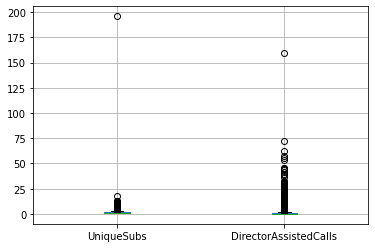

In [9]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

0.95      3.0
0.96      3.0
0.97      4.0
0.98      4.0
0.99      5.0
1.00    196.0
Name: UniqueSubs, dtype: float64

0.95      4.21
0.96      4.70
0.97      5.69
0.98      6.93
0.99      9.65
1.00    159.39
Name: DirectorAssistedCalls, dtype: float64

79.6352173917959
13.567030188887145
UniqueSubs               5.00
DirectorAssistedCalls    9.65
Name: 0.99, dtype: float64
Int64Index([   61,   104,   121,   227,   523,   583,   823,  1158,  1282,
             1440,
            ...
            49307, 49406, 49529, 49565, 49602, 50169, 50487, 50502, 50583,
            50733],
           dtype='int64', length=234)
UniqueSubs               4.00
DirectorAssistedCalls    9.65
Name: 0.99, dtype: float64
Int64Index([   83,    87,   107,   144,   145,   157,   161,   181,   192,
              210,
            ...
            50406, 50447, 50613, 50662, 50669, 50754, 50803, 50817, 50862,
            50870],
           dtype='int64', length=484)


<AxesSubplot:>

1.8238561840911958
2.9465577054404513


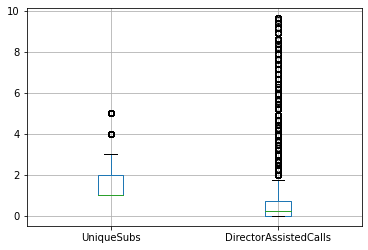

In [10]:
#Remove top 1% outliers from the  two columns "UniqueSubs","DirectorAssistedCalls" and plot the box plot again
#Use "quantile" function to identify top 1% outliers

q_value = [i/100 for i in range(95,101,1)]
cust_df['UniqueSubs'].quantile(q_value)
cust_df['DirectorAssistedCalls'].quantile(q_value)
print(cust_df['UniqueSubs'].skew())               #check for skewness as a normal distribution test ideally skewness is between -1 and 1
print(cust_df['DirectorAssistedCalls'].skew())    #skewness of 81.165 and 13.791 indicates extreme right skewness

#finding the 2 outlier values mentioned above and drop them
def FindnDrop_outliers(df, cols):         
    for i in cols:
        print(df[cols].quantile(0.99))
        print(df.index[df[i]>df[i].quantile(0.99)])
        df.drop(df.index[df[i]>df[i].quantile(0.99)],inplace=True)     #Note: only run this once or it will repeatedly remove
        
FindnDrop_outliers(cust_df, cols)

#Visually checking the boxplot after removing the outliers
cust_df.boxplot(column = cols)
print(cust_df['UniqueSubs'].skew())               #check again for skewness as a normal distribution test after removing outliers
print(cust_df['DirectorAssistedCalls'].skew())

## Note: 
After removing the top 1% of outliers, the skewness improved from 79.6 and 13.5 to 1.8 and 2.9 (Ideally should be -1 to 1).
We can still see from the above boxplot that some mild outliers are still present.

## Below is alternate code (not in use) for outlier detection with IQR method.

cust_df=pd.read_csv("Mini_project_3_Data.xls")
cust_df.drop(cust_df[cust_df.MonthlyRevenue == 0].index, inplace=True)
q1=cust_df['UniqueSubs'].quantile(0.25)
q3=cust_df['UniqueSubs'].quantile(0.75)
IQR=q3-q1
IQR

lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
lower_limit, upper_limit

cust_df[(cust_df.UniqueSubs>upper_limit)] #top outlier for uniquesubs

cust_df[(cust_df.UniqueSubs<lower_limit)] #just for checking lower outlier, box plot indicate none already

cust_df=pd.read_csv("Mini_project_3_Data.xls")
cust_df.drop(cust_df[cust_df.MonthlyRevenue == 0].index, inplace=True)
q1=cust_df['DirectorAssistedCalls'].quantile(0.25)
q3=cust_df['DirectorAssistedCalls'].quantile(0.75)
IQR=q3-q1
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
cust_df[(cust_df.DirectorAssistedCalls>upper_limit)]

#Remove top 1% outliers from the above mentioned two columns and plot the box plot again
cust_df=pd.read_csv("Mini_project_3_Data.xls")
cust_df.drop(cust_df[cust_df.MonthlyRevenue == 0].index, inplace=True)
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.99)
    iqr = q3-q1 #Interquartile range
    higher_limit = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] < higher_limit)]
    return df_out

cust_df1=remove_outlier(cust_df, 'UniqueSubs')
cust_df2=remove_outlier(cust_df1,'DirectorAssistedCalls')

cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df2.boxplot(column=cols)
#cust_df2.boxplot(column="DirectorAssistedCalls")

## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

<AxesSubplot:xlabel='OverageMinutes', ylabel='MonthlyRevenue'>

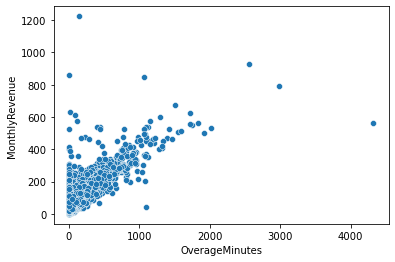

In [11]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
sns.scatterplot(x = 'OverageMinutes', y = 'MonthlyRevenue',data = cust_df)


<AxesSubplot:xlabel='OverageMinutes', ylabel='MonthlyRevenue'>

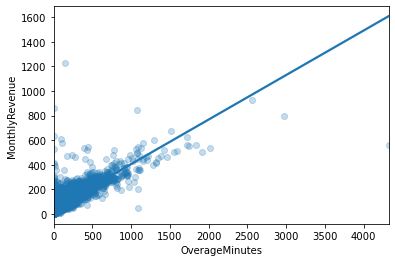

In [12]:
sns.regplot(x = 'OverageMinutes', y = 'MonthlyRevenue', ci=None, data=cust_df, scatter_kws={'alpha':0.25})

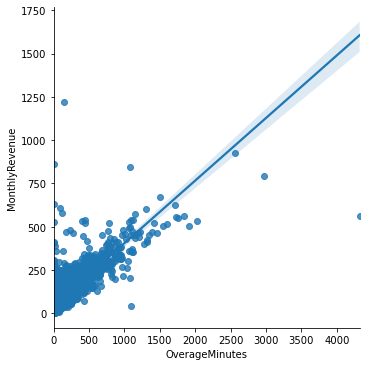

In [13]:
#Fitting a regression line
sns.lmplot(x = 'OverageMinutes', y = 'MonthlyRevenue', data = cust_df, markers="o")

<mark>__Result:__
    
 -> Majority of the dots are clustered at the lower left quadrant with < 600 Monthly Revenue & < 2000 Overage Minutes.

 -> Customers with higher overage minutes also have higher revenue as shown by the upward sloping trendline which indicate a positive correlation.

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

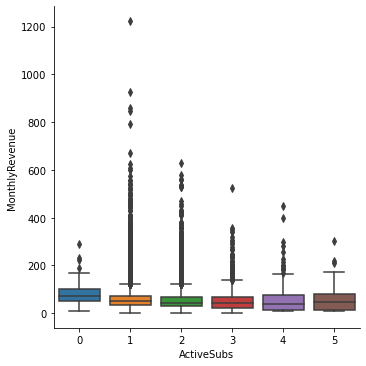

In [14]:
#use category plot to plot monthly revenue for each active subs category MonthlyRevenue
sns.catplot(x="ActiveSubs", y="MonthlyRevenue",kind='box',data=cust_df)

<mark>__Result:__
    
There seems to be an inverse relationship between activesubs and total monthly revenue. As activesub increase the total monthly revenue decrease. This is due to lower active subs having more users than higher active subs. Mean monthly revenue do not change by much.The monthly revenue is quite consistent from 0 to 6 Active subs groups. There is a increase in monthly revenue from 7 and 8 Active subs, 7 being the highest. 

### Q2.3 Does credit rating have an impact in churn rate?

<AxesSubplot:xlabel='CreditRating'>

CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,5780,13175,5707,3902,4963,807,1487
Yes,2570,5662,2571,1378,1413,298,607


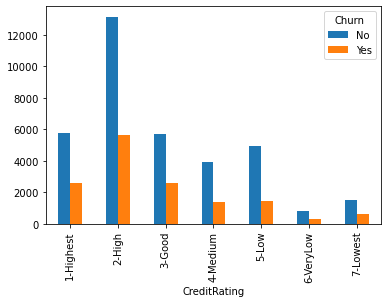

In [15]:
cust_df1=cust_df.groupby(['CreditRating','Churn']).size()
cust_df1=cust_df1.unstack()
cust_df1.plot(kind='bar')
pd.crosstab(cust_df.Churn, cust_df.CreditRating)

## Analysis:
Bulk of the customers belong to CreditRating 1 to 5.

CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,0.692216,0.699421,0.689418,0.739015,0.778388,0.730317,0.710124
Yes,0.307784,0.300579,0.310582,0.260985,0.221612,0.269683,0.289876


<AxesSubplot:xlabel='Churn'>

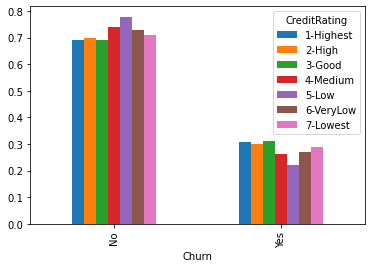

In [16]:
Cr_vs_Churn = pd.crosstab(cust_df.Churn, cust_df.CreditRating).apply(lambda r: r/r.sum(), axis=0) ##pertaining the question
Cr_vs_Churn

Cr_vs_Churn.plot.bar()

## Answer:
Looking at the crosstab chart above, we focus on the 'Yes' part of the Churn. The Churn rate for all CreditRating categories fall between 22% and 31%. We do see a dip in the Churn Rate around the (purple colour bar) CreditRating 5 - Low category. Therefore there is somewhat of an impact on Churn Rate from CreditRating. This is probably due to customers with Medium to Very Low categories in CreditRating always looking out for better deals, and thus Churn relatively more often. 

However, one disclaimer on this hypothesis is that the bulk of the customers in this dataset belong around the CreditRating - High, and few are from the other categories.

### Placeholder for additional exploratory analysis

NewCellphoneUser,No,Yes
Churn,,
No,28870,6951
Yes,11777,2722


NewCellphoneUser,No,Yes
Churn,,
No,0.710262,0.718598
Yes,0.289738,0.281402


<AxesSubplot:xlabel='NewCellphoneUser'>

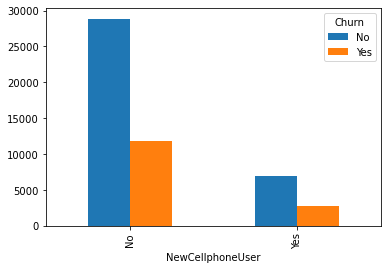

In [17]:
#type your code here for any additional exploratory analysis (if any)
cust_df3=cust_df.groupby(['NewCellphoneUser','Churn']).size()
cust_df3=cust_df3.unstack()

pd.crosstab(cust_df.Churn, cust_df.NewCellphoneUser)
pd.crosstab(cust_df.Churn, cust_df.NewCellphoneUser).apply(lambda r: r/r.sum(), axis=0)
cust_df3.plot(kind='bar')


## Analysis:
The Churn Rate does not vary significantly at 28.1% and 28.9% for both groups of customers who are NewCellphoneUser and Non-NewCellphoneUser. 

## Q3. Create additional features to help predict churn

In [18]:
((cust_df.isnull() | cust_df.isna()).sum() * 100 / cust_df.index.size).round(2)
cust_df.shape

CustomerID                   0.00
Churn                        0.00
MonthlyRevenue               0.31
MonthlyMinutes               0.31
TotalRecurringCharge         0.31
DirectorAssistedCalls        0.31
OverageMinutes               0.31
RoamingCalls                 0.31
PercChangeMinutes            0.72
PercChangeRevenues           0.72
DroppedCalls                 0.00
BlockedCalls                 0.00
UnansweredCalls              0.00
CustomerCareCalls            0.00
ThreewayCalls                0.00
ReceivedCalls                0.00
OutboundCalls                0.00
InboundCalls                 0.00
PeakCallsInOut               0.00
OffPeakCallsInOut            0.00
DroppedBlockedCalls          0.00
CallForwardingCalls          0.00
CallWaitingCalls             0.00
MonthsInService              0.00
UniqueSubs                   0.00
ActiveSubs                   0.00
ServiceArea                  0.05
Handsets                     0.00
HandsetModels                0.00
CurrentEquipme

(50320, 58)

In [19]:
#wrapper function to create additional features for churn prediction
def create_features(cust_df):
    
    #3.1 Percent of current active subs over total subs
    cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    cust_df['perc_recurrent_charge']= cust_df['TotalRecurringCharge'] / cust_df['MonthlyRevenue']
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    cust_df['perc_overage_minutes']= cust_df['OverageMinutes'] / cust_df['MonthlyMinutes']
    
    #type your code here to creat any other additional features which you think will help improve your model accuracy
    
    
    return cust_df  


In [20]:
#Make a call to the feature engineering wrapper function for churn prediction
cust_df4=create_features(cust_df)
cust_df4

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No,0.5,0.916667,0.000000
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes,1.0,1.000589,0.000000
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes,1.0,1.000000,0.000000
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No,1.0,0.911522,0.000000
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes,1.0,0.991832,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,LAXSFN818,2.0,2.0,526.0,68.0,64.0,No,Yes,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes,1.0,NaN,NaN
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29,1,1,LAXCDG310,2.0,2.0,464.0,48.0,48.0,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,No,0,9,No,1,60,No,3-Good,Other,Other,No,1.0,0.893139,0.025788
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,1,1,LAXCDG310,3.0,2.0,378.0,36.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,7,No,1,80,No,5-Low,Other,Clerical,No,1.0,NaN,NaN
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1,1,NEVPOW619,2.0,2.0,433.0,32.0,0.0,Yes,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,9,No,0,30,No,5-Low,Other,Other,No,1.0,NaN,NaN


## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [21]:
from sklearn.model_selection import train_test_split
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
cust_df4=cust_df4.dropna()
cust_df4['churnboolean'] = np.where(cust_df4['Churn']== 'Yes', 1, 0)


In [22]:
cust_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48399 entries, 0 to 51043
Data columns (total 62 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 48399 non-null  int64  
 1   Churn                      48399 non-null  object 
 2   MonthlyRevenue             48399 non-null  float64
 3   MonthlyMinutes             48399 non-null  float64
 4   TotalRecurringCharge       48399 non-null  float64
 5   DirectorAssistedCalls      48399 non-null  float64
 6   OverageMinutes             48399 non-null  float64
 7   RoamingCalls               48399 non-null  float64
 8   PercChangeMinutes          48399 non-null  float64
 9   PercChangeRevenues         48399 non-null  float64
 10  DroppedCalls               48399 non-null  float64
 11  BlockedCalls               48399 non-null  float64
 12  UnansweredCalls            48399 non-null  float64
 13  CustomerCareCalls          48399 non-null  flo

In [23]:
for i in list(cust_df4):  
    if len(cust_df4[cust_df4[i]=='Unknown']) > 0 :
            print(cust_df4[i])
            print(len(cust_df4[cust_df4[i]=='Unknown'])/len(cust_df4[i]))

0          Known
1          Known
2        Unknown
3          Known
5          Known
          ...   
51033      Known
51037      Known
51040      Known
51041      Known
51043      Known
Name: Homeownership, Length: 48399, dtype: object
0.32120498357404076
0             30
1             30
2        Unknown
3             10
5             30
          ...   
51033    Unknown
51037    Unknown
51040    Unknown
51041         30
51043         60
Name: HandsetPrice, Length: 48399, dtype: object
0.5689373747391475
0             No
1            Yes
2            Yes
3             No
5            Yes
          ...   
51033         No
51037        Yes
51040    Unknown
51041        Yes
51043         No
Name: MaritalStatus, Length: 48399, dtype: object
0.37385069939461557


## Note: 

From the output we can see there are 3 columns where there are 'Unknown' as cell values. We investigate and find that for both MaritalStatus and HomeOwnership, unknowns are valid as there are only 2 or 3 sub-categorical values in all the cells in their respective columns. However, for the HandsetPrice column, 'Unknown' takes 56.57% of all values and is there among various handset prices, therefore we choose to omit it from the train and test sets. 

In [24]:
cust_df4['churnboolean'].value_counts()

0    34752
1    13647
Name: churnboolean, dtype: int64

oversampling to eliminate imbalance data

In [25]:
import sys
np.set_printoptions(threshold=1000)

In [26]:
class_0 = cust_df4[cust_df4['churnboolean'] == 0]
class_1 = cust_df4[cust_df4['churnboolean'] == 1]
class_count_0, class_count_1 = cust_df4['churnboolean'].value_counts()
classdf4_1_over = class_1.sample(class_count_0, replace=True)  #oversampling is preferred, undersampling is used when decrespancy is very large
cust_df6 = pd.concat([classdf4_1_over, class_0], axis=0)
cust_df6['churnboolean'].value_counts()

0    34752
1    34752
Name: churnboolean, dtype: int64

In [27]:
labels = np.array(cust_df6['churnboolean'])
labels

array([1, 1, 1, ..., 0, 0, 0])

In [28]:
cust_df5=cust_df6.drop(['Churn','churnboolean','HandsetPrice'], axis=1)
import category_encoders as ce

encoder=ce.OrdinalEncoder(cols=['ServiceArea','ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 
                       'TruckOwner', 'RVOwner','Homeownership','BuysViaMailOrder','RespondsToMailOffers','OptOutMailings','NonUSTravel','OwnsComputer','HasCreditCard','OwnsMotorcycle','MadeCallToRetentionTeam','NewCellphoneUser','NotNewCellphoneUser','CreditRating','PrizmCode','Occupation','MaritalStatus'])
cust_df5=encoder.fit_transform(cust_df5)

Features=cust_df5.to_numpy()


In [29]:
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.3)
X_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [30]:
print(Features.shape)
print(Features[:2, :]) 

(69504, 59)
[[ 3.24506200e+06  3.34200000e+01  2.47000000e+02  2.50000000e+01
   7.40000000e-01  2.10000000e+01  3.20000000e+00 -2.47000000e+02
  -2.34000000e+01  5.30000000e+00  3.00000000e-01  1.10000000e+01
   0.00000000e+00  0.00000000e+00  3.28000000e+01  8.30000000e+00
   1.30000000e+00  4.50000000e+01  2.43000000e+01  5.70000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+01  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   3.14000000e+02  0.00000000e+00  0.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  7.48055057e-01  8.50202429e-02]
 [ 3.28898600

In [31]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.95047165,  0.46259334, -0.37933836, ...,  0.37837333,
         0.23082958, -0.48784409],
       [-1.25270546,  0.02401897,  0.58775393, ...,  0.37837333,
         0.39675827, -0.23180847],
       [-0.32637346, -0.57142643, -0.31040102, ...,  0.37837333,
        -2.09691565,  1.79893088],
       ...,
       [-0.2736534 , -0.24724212, -0.72205538, ...,  0.37837333,
        -0.43063232,  2.57052711],
       [-1.55511362, -0.57498628, -0.80478018, ...,  0.37837333,
         1.47410186, -0.57083847],
       [-1.00950278, -0.56739192, -0.8008409 , ...,  0.37837333,
        -0.08293528,  0.42509411]])

### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [32]:
#-------------------------------- Model training -------------------------------#

#type your code to build logistic regression model on training data set
logistic_mod = linear_model.LogisticRegression(max_iter=1000) 
logistic_mod.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [33]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted model
print(logistic_mod.intercept_)
print(logistic_mod.coef_)


#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:15]))
print(y_test[:15])

#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix

def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores,zero_division=0)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores) 


[-0.00141999]
[[-6.53568548e-02 -1.50425185e-01 -9.11204145e-02  8.15453097e-02
  -5.81501275e-03  1.36937335e-01  9.56121978e-02 -1.30296668e-01
   1.11696213e-01  1.22150481e-01  1.19515137e-01  1.85086897e-02
  -2.55284147e-02 -3.74935483e-02  1.63916354e-02  4.43543096e-02
  -3.85416051e-02 -5.19467313e-02 -4.21597049e-02 -1.06614968e-01
  -3.02165562e-05  6.40258055e-03 -2.31937857e-01  6.69407783e-02
  -4.47770870e-02 -2.86116243e-02  1.02736244e-01  1.15000364e-02
   3.60793185e-01 -8.54855758e-02 -3.21140506e-02  6.16831891e-02
   9.16893251e-02  3.92106355e-02 -3.60662433e-03  1.65943440e-04
   6.57390366e-03  3.45382203e-02 -8.48921562e-02  4.79093092e-03
   7.75000169e-03  1.06390936e-02  8.94735809e-02  4.85623715e-02
  -3.51150036e-02 -1.63521683e-03  1.77390852e-02 -8.41786736e-03
  -4.25361388e-02  1.66291740e-02 -4.29244223e-02  1.00480672e-01
  -7.11101055e-02  3.22288741e-02  2.12226715e-03 -5.87022266e-02
  -6.90090060e-02 -9.26390854e-02  4.29693453e-02]]
[[0.351029

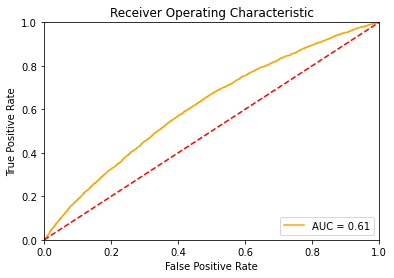

In [34]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)  

# HOT ENCODING METHOD

In [35]:
for i in list(cust_df6):  
    if len(cust_df6[cust_df6[i]=='Unknown']) > 0 :
            print(cust_df6[i])
            print(len(cust_df6[cust_df6[i]=='Unknown'])/len(cust_df6[i]))

30776    Unknown
36194      Known
22654    Unknown
37300      Known
7649       Known
          ...   
51030      Known
51032    Unknown
51037      Known
51040      Known
51043      Known
Name: Homeownership, Length: 69504, dtype: object
0.3236360497237569
30776    Unknown
36194    Unknown
22654        150
37300    Unknown
7649     Unknown
          ...   
51030         80
51032         30
51037    Unknown
51040    Unknown
51043         60
Name: HandsetPrice, Length: 69504, dtype: object
0.5760244014732965
30776    Unknown
36194    Unknown
22654        Yes
37300        Yes
7649         Yes
          ...   
51030         No
51032    Unknown
51037        Yes
51040    Unknown
51043         No
Name: MaritalStatus, Length: 69504, dtype: object
0.37874079189686927


In [36]:
#using hotencoding linear regression
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 
                       'TruckOwner', 'RVOwner','Homeownership','BuysViaMailOrder','RespondsToMailOffers','OptOutMailings','NonUSTravel','OwnsComputer','HasCreditCard','OwnsMotorcycle','MadeCallToRetentionTeam','NewCellphoneUser','NotNewCellphoneUser','CreditRating','PrizmCode','Occupation','MaritalStatus']

FeaturesHOT = encode_string(cust_df6['ServiceArea'])
for col in categorical_columns:
    temp = encode_string(cust_df6[col])
    FeaturesHOT = np.concatenate([FeaturesHOT, temp], axis = 1)

print(FeaturesHOT.shape)
print(FeaturesHOT[:2, :])  

(69504, 795)
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [37]:
cust_df6.head(1)

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minutes,churnboolean
30776,3245062,Yes,33.42,247.0,25.0,0.74,21.0,3.2,-247.0,-23.4,5.3,0.3,11.0,0.0,0.0,32.8,8.3,1.3,45.0,24.3,5.7,0.0,0.0,10,1,1,NEVSDG619,1.0,1.0,314.0,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,0,No,0,Unknown,No,2-High,Suburban,Other,Unknown,1.0,0.748055,0.08502,1


In [38]:
FeaturesHOT = np.concatenate([FeaturesHOT, np.array(cust_df6[['CustomerID', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge','DirectorAssistedCalls','OverageMinutes','RoamingCalls','PercChangeMinutes','PercChangeRevenues','DroppedCalls','BlockedCalls','UnansweredCalls','CustomerCareCalls','ThreewayCalls','ReceivedCalls','OutboundCalls','InboundCalls','PeakCallsInOut','OffPeakCallsInOut','DroppedBlockedCalls','CallForwardingCalls','CallWaitingCalls','MonthsInService','UniqueSubs','ActiveSubs','Handsets','HandsetModels','CurrentEquipmentDays','AgeHH1','AgeHH2','RetentionCalls','RetentionOffersAccepted','ReferralsMadeBySubscriber','IncomeGroup','AdjustmentsToCreditRating','perc_active_subs','perc_recurrent_charge','perc_overage_minutes']])], axis = 1)
print(FeaturesHOT.shape)
print(FeaturesHOT[:2, :])   

(69504, 833)
[[0.         0.         0.         ... 1.         0.74805506 0.08502024]
 [0.         0.         0.         ... 1.         1.22249389 0.        ]]


In [39]:
indx = range(FeaturesHOT.shape[0])
indx = ms.train_test_split(indx, test_size = 0.3)
X_train = FeaturesHOT[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = FeaturesHOT[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [40]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.01199582, -0.02442183, -0.02312344, ...,  0.3804637 ,
         1.31959964, -0.56959306],
       [-0.01199582, -0.02442183, -0.02312344, ...,  0.3804637 ,
         0.50306975, -0.56959306],
       [-0.01199582, -0.02442183, -0.02312344, ...,  0.3804637 ,
         0.94303638, -0.56959306],
       ...,
       [-0.01199582, -0.02442183, -0.02312344, ...,  0.3804637 ,
         0.30225952, -0.56959306],
       [-0.01199582, -0.02442183, -0.02312344, ..., -2.57004639,
        -1.72838864,  5.59065975],
       [-0.01199582, -0.02442183, -0.02312344, ..., -2.57004639,
        -0.04461324, -0.2195787 ]])

In [41]:
logistic_modHOT = linear_model.LogisticRegression(max_iter=1000) 
logistic_modHOT.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [42]:
print(logistic_modHOT.intercept_)
print(logistic_modHOT.coef_)

[-0.02697871]
[[-8.36608873e-04  4.14525323e-02 -1.10370578e-02  1.92138223e-02
  -1.91291007e-03 -5.23649283e-02 -5.20838479e-03  5.28997136e-03
   0.00000000e+00  8.95368097e-03  9.90228120e-03  6.69722253e-02
   1.16979380e-02  2.65155000e-03 -1.95753222e-02 -7.96782013e-02
  -3.96887762e-02 -1.07999711e-02  1.69082809e-02 -5.34144063e-02
   5.62720253e-02 -5.72027236e-02  1.03934609e-02  5.67361228e-02
   3.12179969e-03 -2.42922175e-02 -5.40006483e-02 -6.79196565e-04
  -1.97258424e-02  3.07964337e-03  1.92767699e-02 -4.74951941e-03
   6.33655679e-03  1.37150549e-03  8.47219767e-03 -1.42776003e-02
   2.50984211e-03 -5.80189479e-02 -3.87701585e-02 -2.09488845e-03
  -5.86328692e-03 -1.19364554e-02  4.32281223e-03 -3.73426234e-02
   3.50517316e-03 -1.17522555e-02  9.65258063e-03  7.83888897e-02
  -3.80187755e-02 -3.25826781e-02 -5.85351507e-02  1.09234819e-03
   5.99409181e-03  7.15478217e-03 -5.59177601e-02  6.52410102e-03
  -9.84246394e-03  2.07858298e-03 -3.42159081e-03 -4.14430099e

In [43]:
probabilitiesHOT = logistic_modHOT.predict_proba(X_test)
print(probabilitiesHOT[:15,:])

[[5.96168954e-01 4.03831046e-01]
 [5.63857957e-01 4.36142043e-01]
 [5.90355219e-01 4.09644781e-01]
 [5.22346761e-01 4.77653239e-01]
 [4.77035731e-01 5.22964269e-01]
 [3.51458396e-01 6.48541604e-01]
 [4.10883764e-01 5.89116236e-01]
 [5.14606471e-01 4.85393529e-01]
 [4.49669145e-01 5.50330855e-01]
 [9.99867222e-01 1.32777780e-04]
 [4.71344319e-01 5.28655681e-01]
 [5.92977202e-01 4.07022798e-01]
 [5.92669997e-01 4.07330003e-01]
 [4.04872049e-01 5.95127951e-01]
 [4.67107729e-01 5.32892271e-01]]


In [44]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilitiesHOT, 0.5)
print(np.array(scores[:15]))
print(y_test[:15])

[0 0 0 0 1 1 1 0 1 0 1 0 0 1 1]
[1 0 1 0 1 1 0 1 1 0 0 0 1 1 1]


In [45]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores,zero_division=0)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive      6221              4197
Actual negative      4208              6226

Accuracy  0.60
 
           Positive      Negative
Num case    10418         10434
Precision    0.60          0.60
Recall       0.60          0.60
F1           0.60          0.60


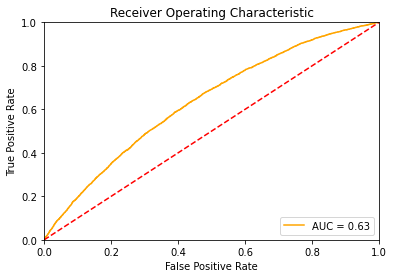

In [46]:
  plot_auc(y_test, probabilitiesHOT)  

## Analysis:
Both hot encoding and ordinal encoding method give the similar output.

### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [47]:
#-------------------------------- Model training -------------------------------#

#type your code to build random forest classifier model on training data set
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
#X = cust_df4[['perc_active_subs', 'perc_recurrent_charge', 'perc_overage_minutes']]
X = Features
#Y = cust_df4['churnboolean']
Y = labels
X = preprocessing.StandardScaler().fit_transform(X)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 222)


model = RandomForestClassifier(random_state= 222).fit(X_Train,Y_Train)



In [48]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted RF model
predictionforest = model.predict(X_Test)

#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)

probabilities1 = model.predict_proba(X_Test)
print(probabilities1[:15,:])
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities1, 0.5)
print(np.array(scores[:15]))
print(Y_Test[:15])

#Evaluate model accuracy using fitted y value and actual y_test
acc1 = accuracy_score(Y_Test,predictionforest)
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))


[[0.02 0.98]
 [0.02 0.98]
 [0.64 0.36]
 [0.71 0.29]
 [0.61 0.39]
 [0.58 0.42]
 [0.68 0.32]
 [0.67 0.33]
 [0.23 0.77]
 [0.52 0.48]
 [0.01 0.99]
 [0.85 0.15]
 [0.07 0.93]
 [0.06 0.94]
 [0.15 0.85]]
[1 1 0 0 0 0 0 0 1 0 1 0 1 1 1]
[1 1 0 0 0 0 0 0 1 0 1 0 1 1 1]
[[9439 1080]
 [1327 9006]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     10519
           1       0.89      0.87      0.88     10333

    accuracy                           0.88     20852
   macro avg       0.88      0.88      0.88     20852
weighted avg       0.88      0.88      0.88     20852



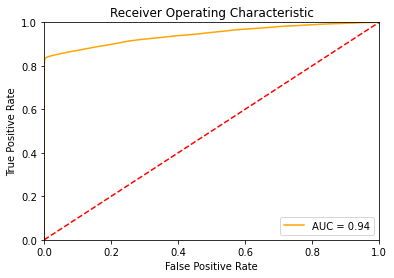

In [49]:
  plot_auc(Y_Test, probabilities1)  

<mark>__Result:__
    
Random Forest classifier has a better performance due to a much higher accuracy of 0.89 vs 0.59, better precision and recall (< 0.6 for Logistic Model, above 0.87 for RandomForest Model). The AUC score is again alot higher for the Random Forest model as compared to the Logistic Model at 0.95 vs 0.63. Thus the calculated GINI score which is = (2*auc) - 1 will be 0.24 for the logistic model vs  0.88 for the Random Forest model.

### Q4.3 Identify most important features impacting churn

In [50]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created
X = cust_df5
pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)[:20]

CurrentEquipmentDays     0.056243
PercChangeMinutes        0.044697
CustomerID               0.044157
MonthsInService          0.039917
perc_recurrent_charge    0.039620
MonthlyMinutes           0.039561
ServiceArea              0.039442
MonthlyRevenue           0.037000
PercChangeRevenues       0.036848
PeakCallsInOut           0.033953
OffPeakCallsInOut        0.033264
ReceivedCalls            0.032826
UnansweredCalls          0.032283
OutboundCalls            0.031379
DroppedBlockedCalls      0.028421
DroppedCalls             0.026690
TotalRecurringCharge     0.025805
AgeHH1                   0.024983
InboundCalls             0.024683
perc_overage_minutes     0.024468
dtype: float64

<AxesSubplot:>

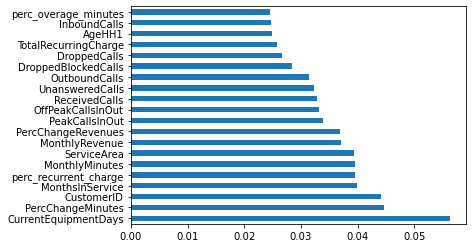

In [51]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

## Answer:
Using the Random Forest Classifier model, the top features ( >4%) impacting churn are:

CurrentEquipmentDays     0.056243

PercChangeMinutes        0.044697

CustomerID               0.044157

MonthsInService          0.039917

perc_recurrent_charge    0.039620

MonthlyMinutes           0.039561

ServiceArea              0.039442

MonthlyRevenue           0.037000

PercChangeRevenues       0.036848

PeakCallsInOut           0.033953

OffPeakCallsInOut        0.033264

ReceivedCalls            0.032826

UnansweredCalls          0.032283

OutboundCalls            0.031379

DroppedBlockedCalls      0.028421

DroppedCalls             0.026690

TotalRecurringCharge     0.025805

AgeHH1                   0.024983

InboundCalls             0.024683

perc_overage_minutes     0.024468

## Q5. Use the hold out data provided to predict churners using the best model identified in step 4 

In [52]:
#Type your code here to predict churners based on the hold out data set provided
#Note #1: use "create_features(cust_df)" functions to create the additional list of features in the hold out data set
#Note #2: Also, perform feature scaling and dummy variables creation as performed during the initial stages of step #4

#Use "predict" function on the transformend data using the best fitted model object
cust_dfho=pd.read_csv("Mini_project_3_Hold_Out_Data.xls")
cust_dfho=create_features(cust_dfho)
cust_dfho=cust_dfho.drop(['Churn'], axis=1)
cust_dfho=cust_dfho.dropna()
cust_dfho

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
0,3000006,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,1.0,61.3,1.7,0.3,55.3,46.3,6.3,83.7,157.0,9.3,0.0,5.7,56,1,1,MILMIL414,7,6,240,30.0,0.0,No,No,Yes,Yes,Yes,Unknown,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,5,No,1,150,No,5-Low,Other,Other,No,1.000000,0.643590,0.047619
1,3000018,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,0.7,77.0,8.7,0.0,106.3,14.7,0.7,97.3,90.3,10.3,0.0,0.0,57,1,1,NNYSYR315,6,4,434,56.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,Yes,No,0,6,No,2,80,No,1-Highest,Other,Professional,No,1.000000,1.303639,0.000000
2,3000034,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,3.0,176.0,11.3,0.3,213.9,103.3,0.3,238.3,192.3,15.7,0.0,4.0,55,1,1,MILMIL414,3,3,700,38.0,24.0,No,No,No,No,No,Unknown,No,No,No,No,No,No,0,0,Yes,No,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes,1.000000,0.513663,0.404235
3,3000070,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,0.7,17.3,0.0,0.0,33.1,8.0,4.7,48.3,7.0,2.7,0.0,0.3,59,3,2,SLCSLC801,6,5,48,46.0,0.0,Yes,No,Yes,Yes,Yes,Known,Yes,Yes,Yes,No,No,Yes,0,0,No,Yes,0,4,No,1,200,No,1-Highest,Other,Other,No,0.666667,0.842933,0.104575
4,3000074,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,6.0,43.7,4.3,0.0,490.1,50.7,8.3,189.3,105.0,8.7,0.0,4.3,52,1,1,OKCTUL918,4,4,408,58.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,3,No,0,10,No,1-Highest,Suburban,Other,No,1.000000,0.904650,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19981,3399734,29.99,57.0,30.0,0.00,0.0,0.0,-15.0,0.0,1.0,1.3,1.3,0.0,0.0,13.1,15.0,1.3,19.3,13.0,2.3,0.0,0.0,32,1,1,LAXCOV626,1,1,950,42.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,6,No,0,Unknown,No,4-Medium,Suburban,Other,No,1.000000,1.000333,0.000000
19986,3399818,30.00,321.0,30.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,2,2,LAXBUR818,3,3,179,38.0,0.0,Yes,Yes,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,No,No,0,3,No,0,30,No,3-Good,Other,Other,Yes,1.000000,1.000000,0.000000
19989,3399854,41.84,351.0,30.0,0.99,31.0,0.0,0.0,0.0,5.0,0.3,18.3,0.0,0.0,26.6,0.7,0.0,76.3,35.0,5.3,0.0,0.0,33,1,1,LAXCOV626,3,3,254,38.0,44.0,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,150,No,4-Medium,Other,Other,Yes,1.000000,0.717017,0.088319
19991,3399862,83.90,825.0,85.0,8.91,0.0,0.0,0.0,0.0,9.7,0.3,24.0,0.0,0.0,176.7,86.7,16.7,186.7,92.3,10.0,0.0,5.0,31,1,1,LAXSMN310,4,4,380,52.0,42.0,No,No,Yes,No,No,Known,No,No,No,Yes,No,Yes,0,0,No,No,0,6,No,1,30,No,3-Good,Other,Professional,No,1.000000,1.013111,0.000000


In [53]:
cust_dfho=cust_dfho.drop(['HandsetPrice'], axis=1)

encoder=ce.OrdinalEncoder(cols=['ServiceArea','ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 
                       'TruckOwner', 'RVOwner','Homeownership','BuysViaMailOrder','RespondsToMailOffers','OptOutMailings','NonUSTravel','OwnsComputer','HasCreditCard','OwnsMotorcycle','MadeCallToRetentionTeam','NewCellphoneUser','NotNewCellphoneUser','CreditRating','PrizmCode','Occupation','MaritalStatus'])
cust_dfho=encoder.fit_transform(cust_dfho)

Features=cust_dfho.to_numpy()
Features
Features = preprocessing.StandardScaler().fit_transform(Features)

array([[3.00000600e+06, 5.74900000e+01, 4.83000000e+02, ...,
        1.00000000e+00, 6.43590190e-01, 4.76190476e-02],
       [3.00001800e+06, 5.52300000e+01, 5.70000000e+02, ...,
        1.00000000e+00, 1.30363933e+00, 0.00000000e+00],
       [3.00003400e+06, 9.73400000e+01, 1.03900000e+03, ...,
        1.00000000e+00, 5.13663448e-01, 4.04234841e-01],
       ...,
       [3.39985400e+06, 4.18400000e+01, 3.51000000e+02, ...,
        1.00000000e+00, 7.17017208e-01, 8.83190883e-02],
       [3.39986200e+06, 8.39000000e+01, 8.25000000e+02, ...,
        1.00000000e+00, 1.01311085e+00, 0.00000000e+00],
       [3.39993800e+06, 8.51500000e+01, 8.15000000e+02, ...,
        6.66666667e-01, 1.03347035e+00, 1.22699387e-03]])

In [54]:
predictionforestho = model.predict(Features)

#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)

probabilities1ho = model.predict_proba(Features)
scoresho = score_model(probabilities1ho, 0.5)
print(np.array(scoresho[:100]))

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


In [55]:
cust_dfho['Pred_Churn'] = pd.Series(scoresho, index=cust_dfho.index)   
cust_dfho.groupby('Pred_Churn').get_group(1)

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minutes,Pred_Churn
5,3000086,60.19,1424.0,56.0,0.25,0.0,0.0,-1134.0,-55.2,23.7,0.0,11.7,0.3,0.0,939.3,7.7,39.0,459.7,174.7,23.7,0.0,5.7,54,1,1,5,13,6,162,50.0,52.0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,2,0,5,1,1,2,1,2,1,2,1.0,0.930387,0.000000,1
54,3001142,32.78,44.0,32.0,0.00,0.0,0.0,-33.0,-0.3,0.0,0.3,1.0,0.0,0.0,7.3,2.7,1.3,14.7,4.0,0.3,0.0,0.0,48,2,2,20,4,2,953,40.0,40.0,1,1,2,1,2,2,2,2,1,1,1,1,0,0,1,1,0,8,1,0,1,2,2,1,3,1.0,0.976205,0.000000,1
58,3001278,19.00,7.0,19.0,0.00,0.0,0.0,-1.0,0.0,0.3,0.3,1.0,0.0,0.0,0.0,0.0,0.0,2.7,0.0,0.7,0.0,0.0,52,1,1,30,2,2,1206,60.0,0.0,1,1,2,2,2,2,2,2,1,1,1,1,0,0,2,2,0,6,1,0,1,2,1,1,2,1.0,1.000000,0.000000,1
72,3001614,60.34,392.0,30.0,0.00,74.0,0.0,-91.0,-7.8,2.3,0.0,24.7,0.0,0.0,52.8,33.0,0.0,76.3,38.3,2.3,0.0,0.3,48,1,1,34,3,2,1179,56.0,0.0,1,2,2,2,2,1,2,2,1,1,1,2,0,0,2,2,0,6,1,0,1,2,4,1,1,1.0,0.497183,0.188776,1
99,3002314,31.26,164.0,30.0,0.99,0.0,0.0,38.0,0.7,3.7,0.0,7.7,0.0,0.0,10.1,8.7,0.0,60.7,23.0,3.7,0.0,0.7,47,2,2,44,1,1,1425,52.0,48.0,1,1,2,2,2,2,1,1,2,1,1,1,0,0,1,1,0,9,1,0,1,2,2,1,2,1.0,0.959693,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19888,3397646,30.24,87.0,40.0,0.25,0.0,0.0,14.0,-0.2,0.7,0.0,2.0,0.0,0.0,10.7,6.0,0.0,15.7,10.0,0.7,0.0,0.3,31,2,1,212,1,1,917,44.0,30.0,2,1,1,2,2,2,2,2,1,1,1,1,1,0,1,2,0,5,1,0,2,2,2,2,2,0.5,1.322751,0.000000,1
19900,3397930,54.91,400.0,50.0,1.32,35.0,0.0,-13.0,-10.1,5.7,4.0,20.7,0.7,0.0,12.5,24.0,3.0,66.0,17.3,9.7,0.0,0.0,29,1,1,231,2,1,398,58.0,34.0,1,1,1,2,2,1,1,1,1,1,2,2,0,0,2,2,0,5,1,0,1,1,1,2,3,1.0,0.910581,0.087500,1
19916,3398310,51.02,431.0,35.0,2.72,28.0,0.0,-275.0,-8.8,28.7,1.7,46.7,0.7,0.0,122.9,3.3,2.0,89.0,126.7,30.3,0.0,6.3,35,1,1,233,4,3,385,0.0,0.0,1,1,1,2,2,1,2,2,1,1,1,2,1,0,1,2,0,0,1,0,2,7,2,1,3,1.0,0.686005,0.064965,1
19923,3398418,51.92,287.0,50.0,0.00,0.0,1.9,-23.0,2.3,3.7,0.3,7.0,0.0,0.0,9.9,4.0,0.0,23.3,14.7,4.0,0.0,0.0,29,1,1,231,1,1,887,40.0,0.0,1,1,1,2,2,1,2,2,1,1,1,1,1,0,1,2,0,7,1,0,2,3,1,1,1,1.0,0.963020,0.000000,1


## Analysis:
These 2261 customers are predicted by the model to churn.

## Q6. [Bonus Question] Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

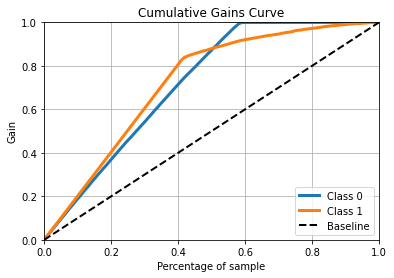

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

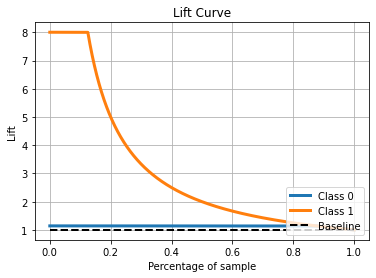

In [56]:
#Type your code here to plot the lift chart from the best model
#Identify the lift i.e. 3x of capturing churn with and without using the model 
#(Assume: only top 20% high risk customers are to be targetted)
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(Y_Test, probabilities1)
plt.show()

skplt.metrics.plot_lift_curve(cust_dfho.Pred_Churn, probabilities1ho)





<mark>__Result:__
    
1. What is the % actual churn captured by targeting top 20% (top 2 deciles) of the customers sorted by their churn probability?
2. What is the total monthly revenue of actual churn customers identified in the top 20% of the customers?
   